## Sample Project: Fit Data and FFT
Use of **LMFIT** to do data fitting, more details at [here](https://lmfit.github.io/lmfit-py/)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, report_fit

Read that data again from *sample.csv*

In [2]:
# can get data file with wget (below) or download/upload
# !wget https://c125.chem.ucla.edu/~c125/F2020/signal.csv
    
data = np.loadtxt('signal.csv')

In [5]:
# quick look at data (optional)
print(data.shape)
data[:5]

(256, 2)


array([[ 0.      ,  1.93923 ],
       [ 1.      ,  1.6673  ],
       [ 2.      ,  1.05309 ],
       [ 3.      ,  0.109447],
       [ 4.      , -0.762086]])

Break data variable into x and y 1-D arrays

In [6]:
x = data[:,0]
y = data[:,1]

For great plotting examples look at [Matplotlib site](http://matplotlib.org); for docs on plot command [Go HERE](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

Let add data points as red 'r' dots 'o' to the plain plot

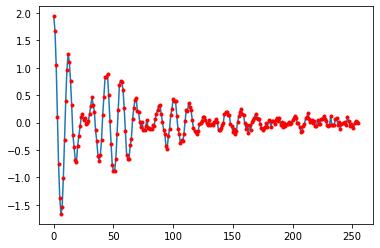

In [7]:
plt.plot(x,y)
plt.plot(x,y,'.r');

Let do more plot decorations, such as title axes labels

### Let's try to do curve fitting

First we create a function and use it to define a model

Let's fit this to $y = cos(ax)e^{-cx} + cos(bx)e^{-cx}$

In [8]:
def decay(x,a=0.4,b=0.6,c=0.01): # initial values of parameters can be set differently
    return np.cos(a*x)*np.exp(-c*x) + np.cos(b*x)*np.exp(-c*x)

Define model and do the fit

In [9]:
model = Model(decay)

result = model.fit(y,x=x)

In [10]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 256
    # variables        = 3
    chi-square         = 0.59127819
    reduced chi-square = 0.00233707
    Akaike info crit   = -1548.08540
    Bayesian info crit = -1537.44987
[[Variables]]
    a:  0.44013354 +/- 2.4992e-04 (0.06%) (init = 0.4)
    b:  0.55985221 +/- 2.4997e-04 (0.04%) (init = 0.6)
    c:  0.01485555 +/- 1.7794e-04 (1.20%) (init = 0.01)


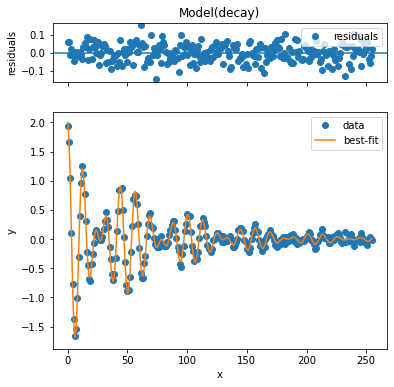

In [11]:
result.plot(); # quick plot optional

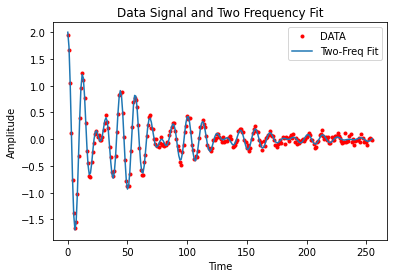

In [14]:
plt.plot(x,y,'.r',label="DATA");
plt.plot(x,result.best_fit,label="Two-Freq Fit");
plt.title('Data Signal and Two Frequency Fit');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.legend();

Let's try a plot of FFT

In [15]:
ftY = np.real(np.fft.fft(y));

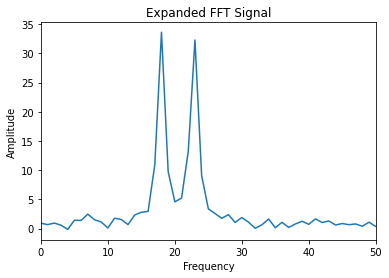

In [16]:
plt.plot(ftY)
plt.xlim(0,50)
plt.title('Expanded FFT Signal');
plt.xlabel('Frequency');
plt.ylabel('Amplitude');

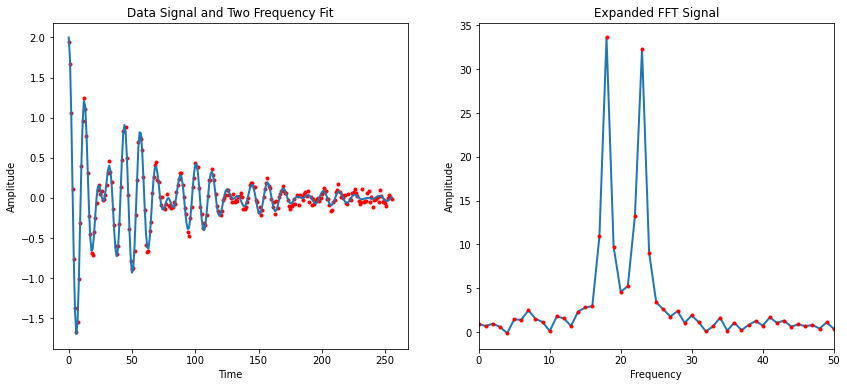

In [17]:
# Optional two plots together
fig = plt.figure(figsize=(14,6));
plt.subplot(1,2,1);
plt.plot(x,y,'.r',label="DATA");
plt.plot(x,result.best_fit,lw=2,label="Two-Freq Fit");
plt.title('Data Signal and Two Frequency Fit');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.subplot(1,2,2);
plt.plot(ftY,lw=2);
plt.plot(ftY,'.r');
plt.xlim(0,50);
plt.title('Expanded FFT Signal');
plt.xlabel('Frequency');
plt.ylabel('Amplitude');
fig.savefig('final-signal.png');